In [1]:
import MoRIC_common_func as cf

In [2]:
directory = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch')
cf.enter_dir(directory)
p = cf.load_data_list('*.2CL')

File list loaded.


In [ ]:
# Find coordinates at the centre of every frame and reorganize into a single dataframe, saving as pickle file
df_centre = cf.pd.DataFrame(columns=['Longitude', 'Latitude'])
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    coor_centre = coor.iloc[[int(1088/2)]]
    df_centre.loc[path] = [coor_centre['Longitude'].values[0], coor_centre['Latitude'].values[0]]
    print('Added ' + path + ' centre coordinates to list')

In [3]:
# Reading pickle stream of image coordinates
df_coor = cf.pd.read_pickle(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch\coor_centre')

# Search for closest images in a defined radius around a POI (Point of Interest)
POI = 'Korolev Crater'
search_radius = 100
coor_POI = '72.8N, 164.5E'

print(f'POI: {POI}')
df_POI = cf.gen_coor(coor_POI)
print(f'Within a search radius of {search_radius} km around {POI}:')
dist_closest = cf.find_closest_images(df_POI, df_coor, search_radius=search_radius)
for key in dist_closest:
    print(f'{key} => {dist_closest[key]:.2f} km')
dist_closest_list = list(dist_closest.keys())

POI: Korolev Crater
Longitude: 164.5, Latitude: 72.8
Within a search radius of 100 km around Korolev Crater:
HX1-Or_GRAS_MoRIC-F-0018_SCI_N_20211121030634_20211121030634_00599_A.2CL => 52.29 km
HX1-Or_GRAS_MoRIC-F-0040_SCI_N_20211124161129_20211124161129_00611_A.2CL => 88.75 km
HX1-Or_GRAS_MoRIC-F-0019_SCI_N_20211121030657_20211121030657_00599_A.2CL => 96.06 km


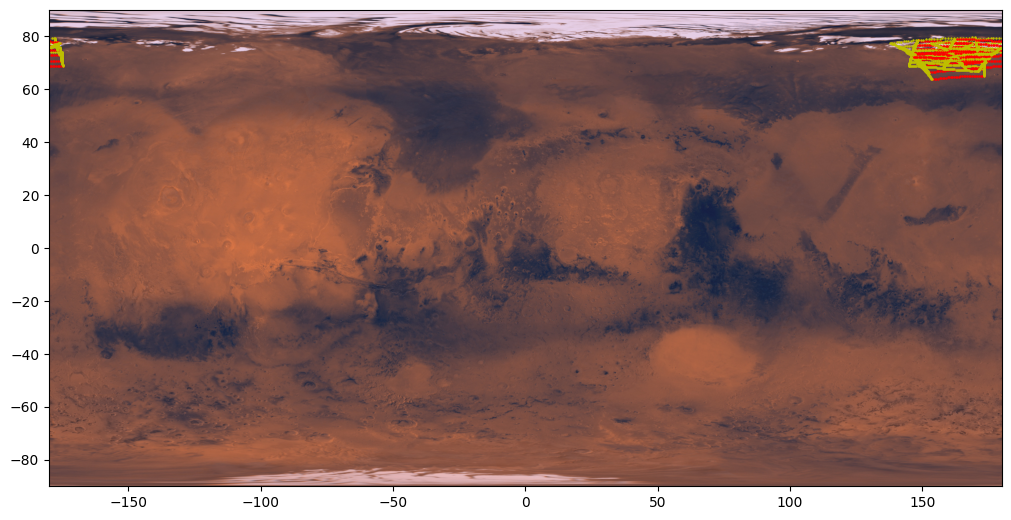

In [4]:
# Preview boundaries associated with the closest images
layout = [['Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_map, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Map'], path_map)
for path in dist_closest:
    coor = cf.read_pds(path)[1]
    #print(coor)
    upper, other = cf.prune_coor(coor)
    #print('Plotting ' + path)
    cf.plot_coor(axes['Map'], upper, other)

cf.plt.show()
#cf.plt.close()

In [4]:
cf.export_image_list(dist_closest_list, POI)

Creating subfolder POI Batch - Korolev Crater
Processing and exporting file (1) HX1-Or_GRAS_MoRIC-F-0018_SCI_N_20211121030634_20211121030634_00599_A
DONE
Processing and exporting file (2) HX1-Or_GRAS_MoRIC-F-0040_SCI_N_20211124161129_20211124161129_00611_A
DONE
Processing and exporting file (3) HX1-Or_GRAS_MoRIC-F-0019_SCI_N_20211121030657_20211121030657_00599_A
DONE
